In [5]:
import random

def roll_die():
    """Roll one Zombie Dice die with faces: Brain, Footprint, Shotgun."""
    return random.choice(['Brain', 'Footprint', 'Shotgun'])

def roll_dice(num_dice=3):
    """Roll num_dice dice and return the results as a list."""
    return [roll_die() for _ in range(num_dice)]

def play_turn():
    brains = 0
    shotguns = 0

    print("Starting your turn. Rolling 3 dice per roll...")

    while True:
        roll_results = roll_dice()
        print(f"Rolled: {', '.join(roll_results)}")

        brains += roll_results.count('Brain')
        shotguns += roll_results.count('Shotgun')

        print(f"Brains collected so far: {brains}")
        print(f"Shotguns received so far: {shotguns}")

        if shotguns >= 3:
            print("⚠️  Too many shotguns! You lost all collected brains this turn.")
            brains = 0
            break

        choice = input("Roll again? (y/n): ").strip().lower()
        if choice != 'y':
            break

    print(f"🎉 Turn ended with {brains} brain(s) collected.")

if __name__ == "__main__":
    play_turn()

Starting your turn. Rolling 3 dice per roll...
Rolled: Brain, Shotgun, Shotgun
Brains collected so far: 1
Shotguns received so far: 2


Roll again? (y/n):  2


🎉 Turn ended with 1 brain(s) collected.


In [9]:
##zigzag
def convert(s: str, num_rows: int) -> str:
    if num_rows == 1 or num_rows >= len(s):
        return s

    rows = [''] * num_rows
    step = -1  # Controls the vertical direction
    curr_row = 0

    for char in s:
        rows[curr_row] += char
        # Flip direction at top and bottom
        if curr_row == 0 or curr_row == num_rows - 1:
            step *= -1
        curr_row += step

    return ''.join(rows)

if __name__ == "__main__":
    input_string = "PAYPALISHIRING"
    num_rows = 3
    result = convert(input_string, num_rows)
    print(f"Converted string: {result}")

Converted string: PAHNAPLSIIGYIR


In [11]:
def print_table(data, headers=None):
    """
    Prints a nicely formatted table.

    :param data: List of lists, where each inner list is a row.
    :param headers: Optional list of column headers.
    """
    # Add headers to data if provided
    if headers:
        data = [headers] + data

    # Determine the number of columns and initialize column widths
    cols = len(data[0])
    col_widths = [0] * cols

    # Calculate max width for each column
    for row in data:
        for i, item in enumerate(row):
            col_widths[i] = max(col_widths[i], len(str(item)))

    # Print each row with padding
    for i, row in enumerate(data):
        line = " | ".join(str(item).ljust(col_widths[j]) for j, item in enumerate(row))
        print(line)

        # Print a separator line after the header row
        if headers and i == 0:
            print("-+-".join('-' * col_widths[j] for j in range(cols)))

if __name__ == "__main__":
    headers = ["Name", "Age", "City"]
    rows = [
        ["Alice", "30", "New York"],
        ["Bob", "25", "Los Angeles"],
        ["Charlie", "35", "Chicago"]
    ]
    print_table(rows, headers)

Name    | Age | City       
--------+-----+------------
Alice   | 30  | New York   
Bob     | 25  | Los Angeles
Charlie | 35  | Chicago    


In [13]:
import random

def get_computer_choice():
    return random.choice(["rock", "paper", "scissors"])

def determine_winner(user_choice, computer_choice):
    if user_choice == computer_choice:
        return "It's a tie!"
    elif (
        (user_choice == "rock" and computer_choice == "scissors") or
        (user_choice == "paper" and computer_choice == "rock") or
        (user_choice == "scissors" and computer_choice == "paper")
    ):
        return "You win!"
    else:
        return "Computer wins!"

def play_game():
    print("Welcome to Rock-Paper-Scissors!")
    user_choice = input("Enter rock, paper, or scissors: ").lower()

    if user_choice not in ["rock", "paper", "scissors"]:
        print("Invalid choice. Please try again.")
        return

    computer_choice = get_computer_choice()
    print(f"Computer chose: {computer_choice}")

    result = determine_winner(user_choice, computer_choice)
    print(result)

if __name__ == "__main__":
    play_game()

Welcome to Rock-Paper-Scissors!


Enter rock, paper, or scissors:  rock


Computer chose: paper
Computer wins!


In [15]:
import random

def guess_the_number():
    number_to_guess = random.randint(1, 10)
    attempts = 0

    print("🎯 Welcome to Guess the Number!")
    print("I'm thinking of a number between 1 and 10. Can you guess it?")

    while True:
        try:
            user_guess = int(input("Enter your guess: "))
            attempts += 1

            if user_guess < number_to_guess:
                print("Too low! Try again.")
            elif user_guess > number_to_guess:
                print("Too high! Try again.")
            else:
                print(f"🎉 Congratulations! You guessed it in {attempts} attempt(s).")
                break
        except ValueError:
            print("⚠️ Please enter a valid number.")

if __name__ == "__main__":
    guess_the_number()

🎯 Welcome to Guess the Number!
I'm thinking of a number between 1 and 10. Can you guess it?


Enter your guess:  3


🎉 Congratulations! You guessed it in 1 attempt(s).


In [17]:
def display_inventory(inventory):
    print("Inventory:")
    total_items = 0
    for item, count in inventory.items():
        print(f"{count} {item}")
        total_items += count
    print(f"Total number of items: {total_items}")

def add_to_inventory(inventory, added_items):
    for item in added_items:
        inventory[item] = inventory.get(item, 0) + 1
    return inventory

if __name__ == "__main__":
    # Starting inventory
    inventory = {'gold coin': 42, 'rope': 1}

    # Loot found
    dragon_loot = ['gold coin', 'dagger', 'gold coin', 'gold coin', 'ruby']

    # Update inventory with loot
    inventory = add_to_inventory(inventory, dragon_loot)

    # Display updated inventory
    display_inventory(inventory)

Inventory:
45 gold coin
1 rope
1 dagger
1 ruby
Total number of items: 48


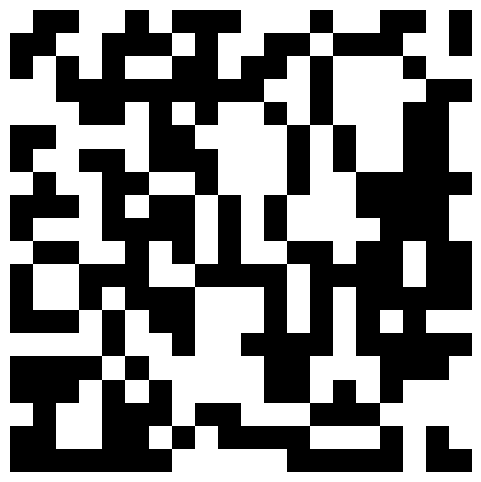

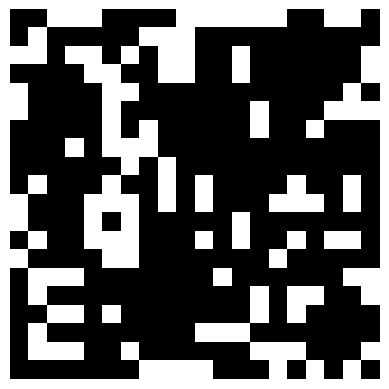

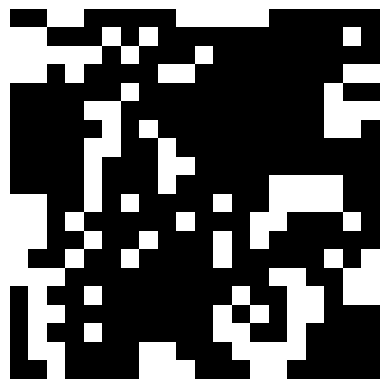

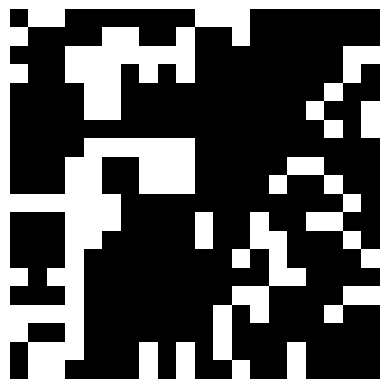

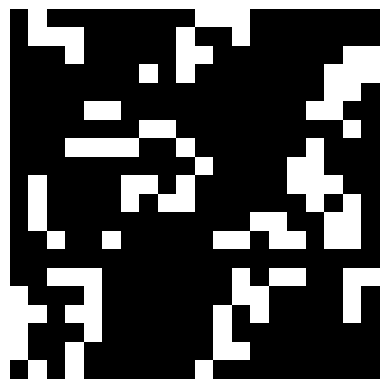

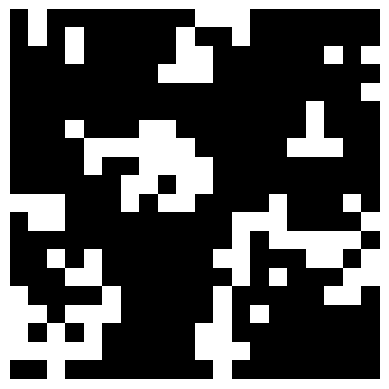

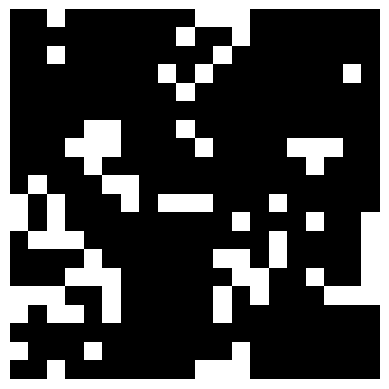

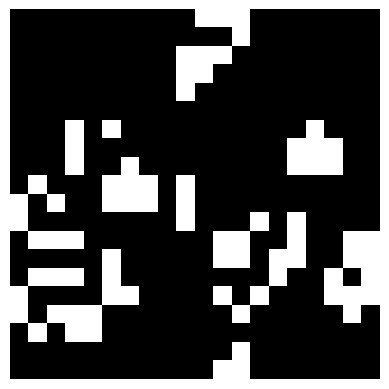

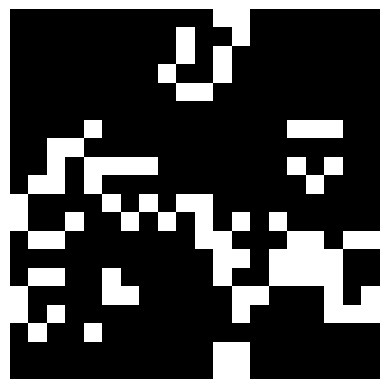

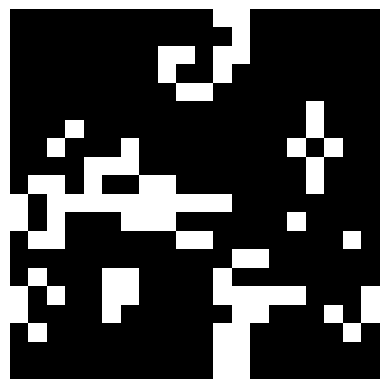

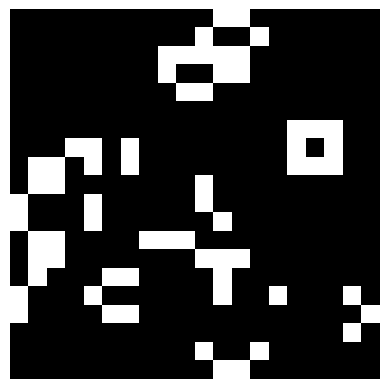

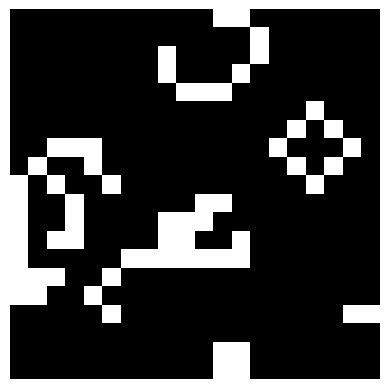

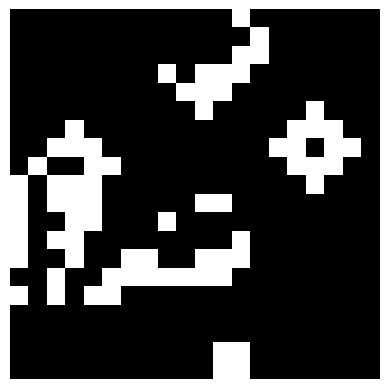

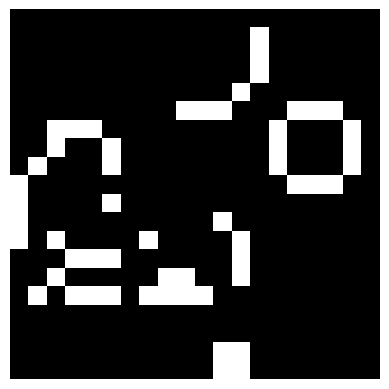

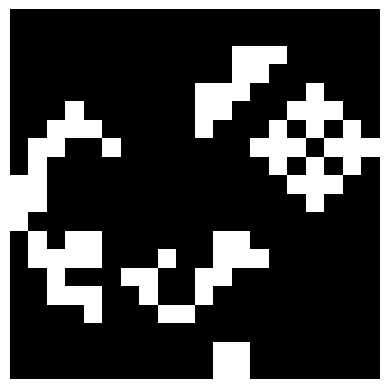

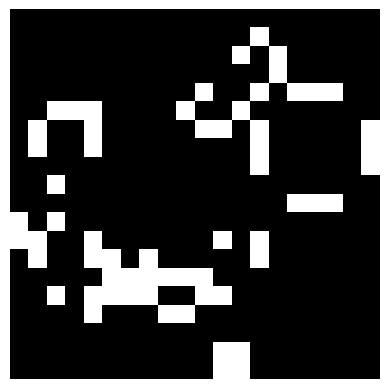

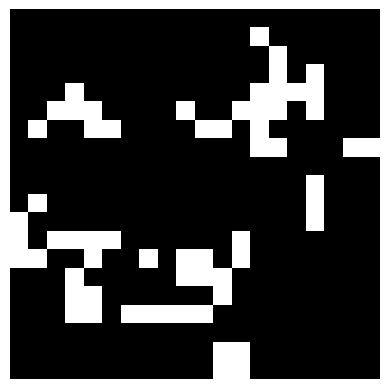

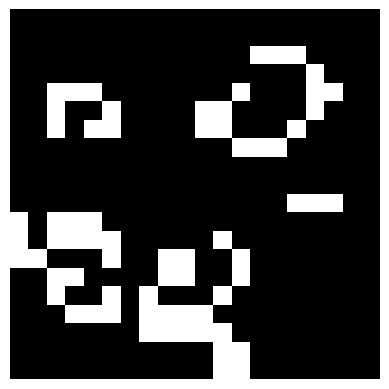

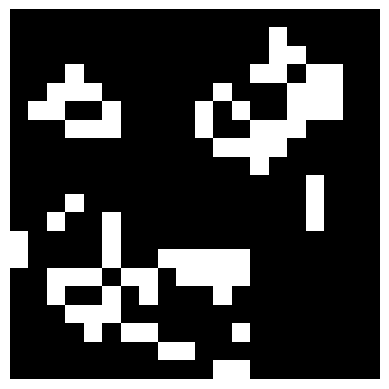

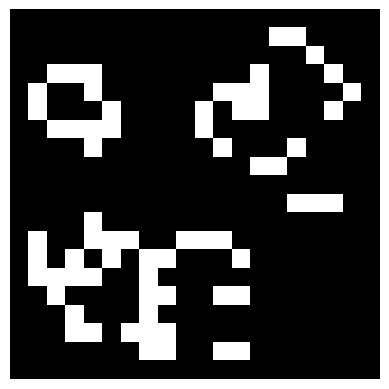

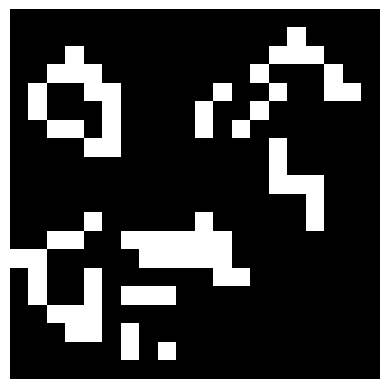

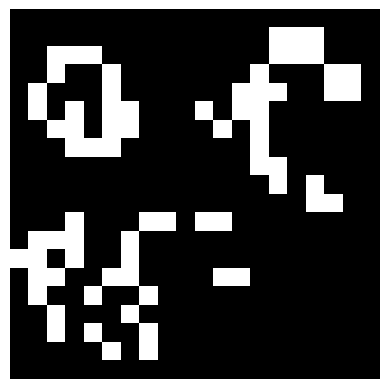

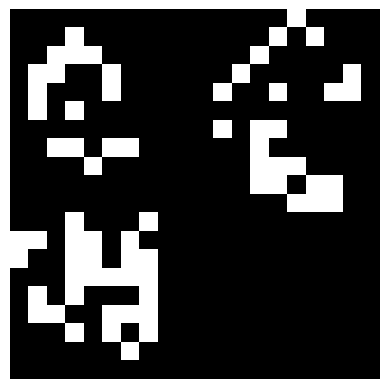

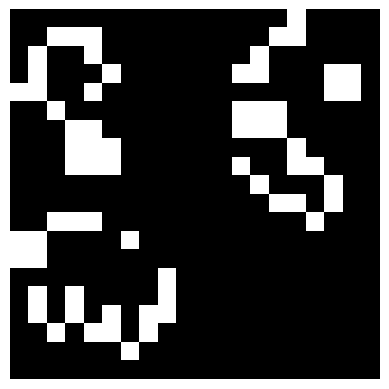

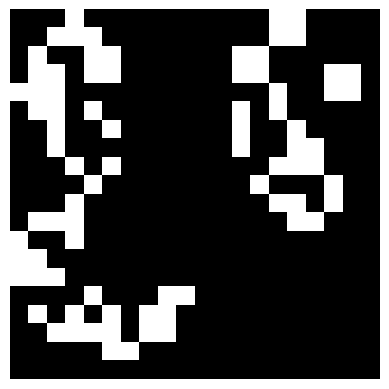

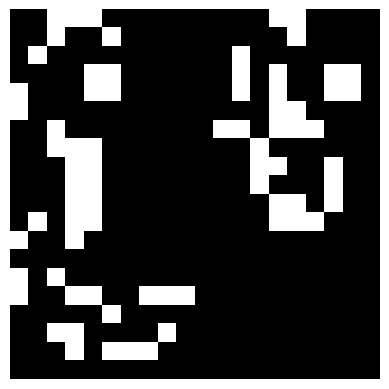

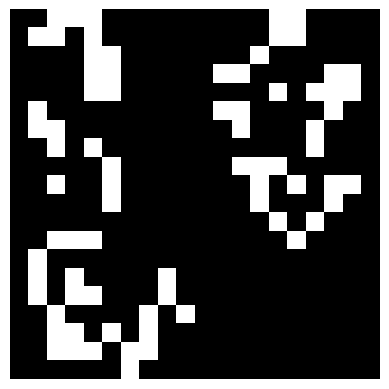

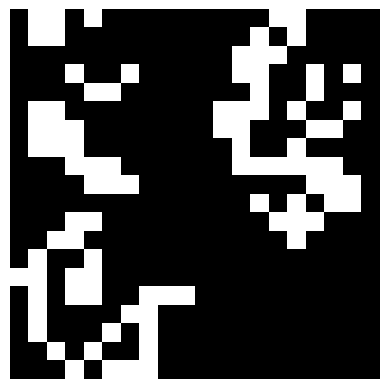

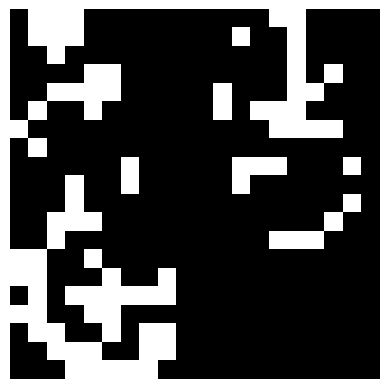

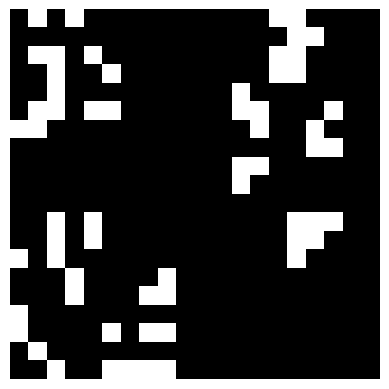

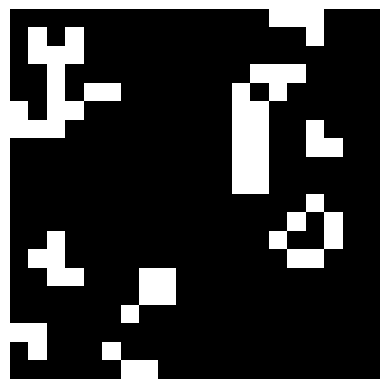

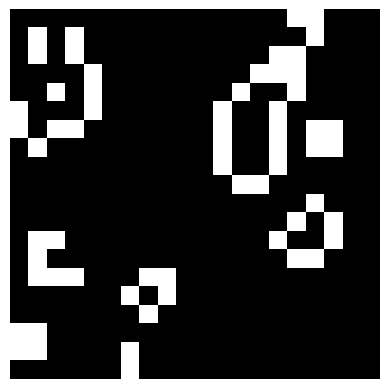

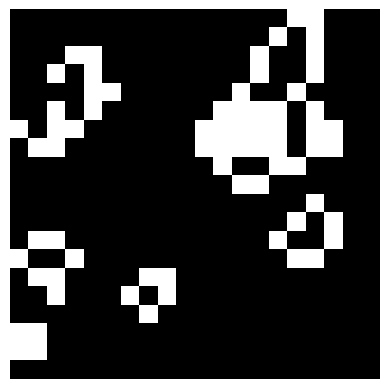

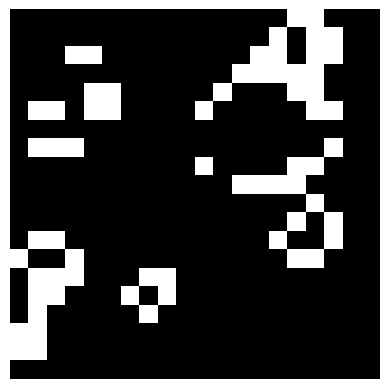

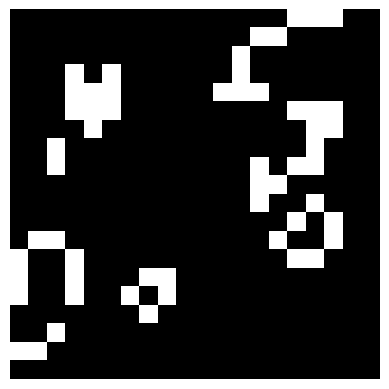

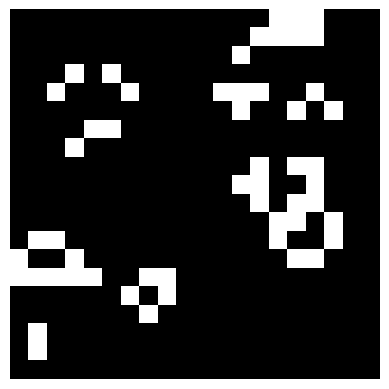

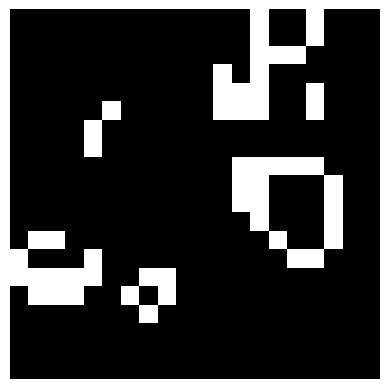

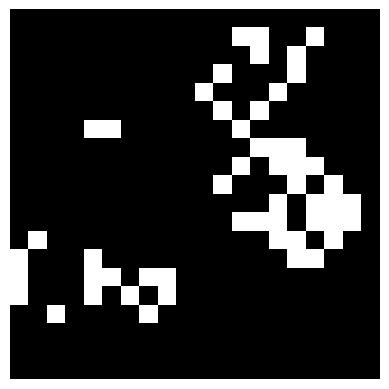

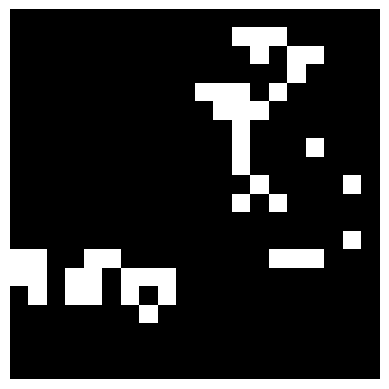

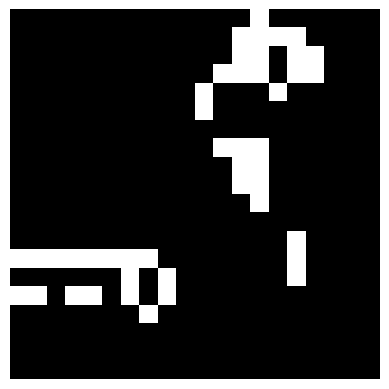

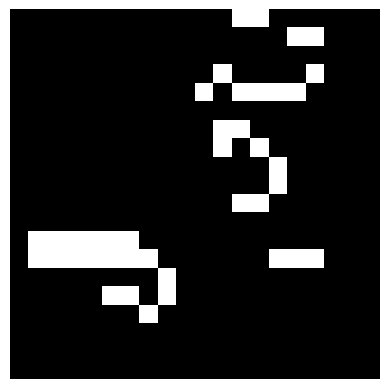

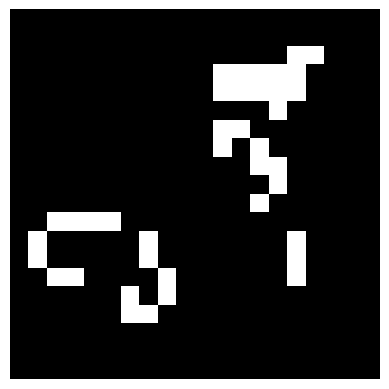

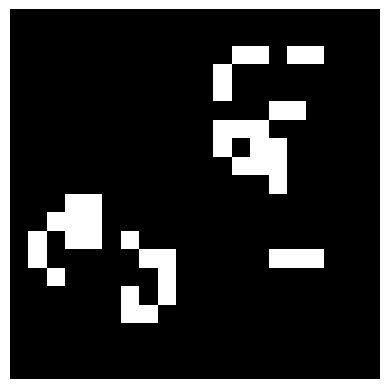

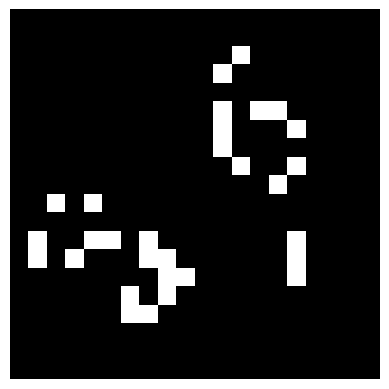

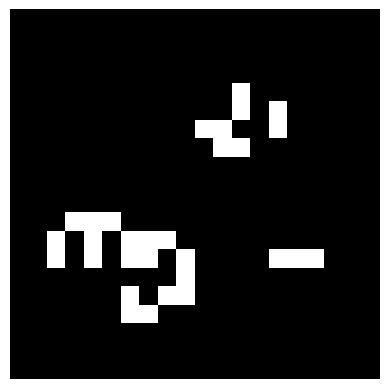

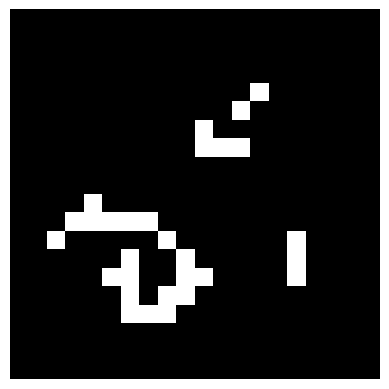

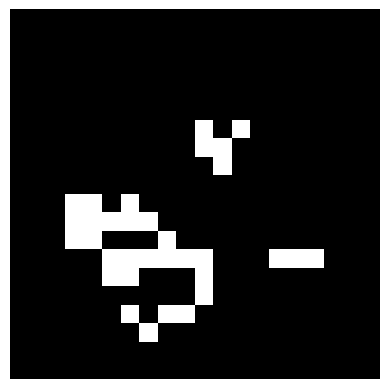

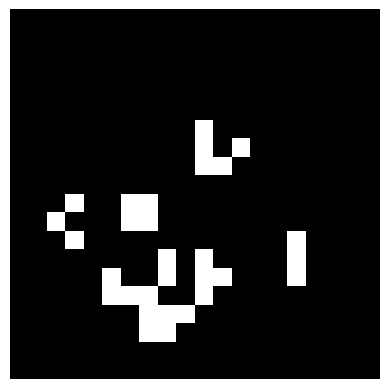

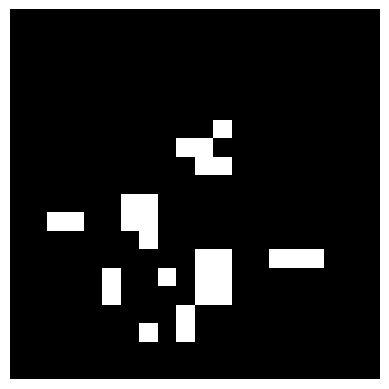

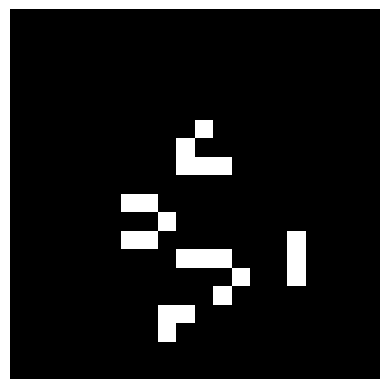

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

def update(grid):
    new_grid = grid.copy()
    rows, cols = grid.shape

    for i in range(rows):
        for j in range(cols):
            # Count live neighbors
            neighbors = np.sum(grid[max(0, i-1):min(rows, i+2),
                                    max(0, j-1):min(cols, j+2)]) - grid[i, j]

            # Apply Conway's Game of Life rules
            if grid[i, j] == 1 and (neighbors < 2 or neighbors > 3):
                new_grid[i, j] = 0  # Dies by under/overpopulation
            elif grid[i, j] == 0 and neighbors == 3:
                new_grid[i, j] = 1  # Becomes alive by reproduction

    return new_grid

def display(grid):
    plt.imshow(grid, cmap="gray")
    plt.axis("off")
    plt.show(block=False)
    plt.pause(0.1)
    plt.clf()

def game_of_life(rows=20, cols=20, iterations=50):
    grid = np.random.choice([0, 1], size=(rows, cols))  # Random initial state

    plt.figure(figsize=(6, 6))

    for _ in range(iterations):
        display(grid)
        grid = update(grid)
        time.sleep(0.1)

    plt.show()

if __name__ == "__main__":
    game_of_life()

In [21]:
def encode(items):
    """
    Encodes a list of strings into a single comma-separated string.
    Escapes commas in items by replacing them with '\,'.
    """
    escaped_items = [item.replace(',', r'\,') for item in items]
    return ','.join(escaped_items)

def decode(encoded_str):
    """
    Decodes a comma-separated string back into a list of strings.
    Handles escaped commas '\,' correctly.
    """
    items = []
    current = []
    escape = False

    for char in encoded_str:
        if escape:
            if char == ',':
                current.append(',')
            else:
                current.append('\\' + char)
            escape = False
        elif char == '\\':
            escape = True
        elif char == ',':
            items.append(''.join(current))
            current = []
        else:
            current.append(char)

    items.append(''.join(current))
    return items

if __name__ == "__main__":
    # Example usage
    original_list = ["apple", "banana,fruit", "orange", "grape\\vine"]
    print("Original list:", original_list)

    encoded = encode(original_list)
    print("Encoded string:", encoded)

    decoded = decode(encoded)
    print("Decoded list:", decoded)

    # Check if decoding matches original
    print("Decoding matches original:", decoded == original_list)

Original list: ['apple', 'banana,fruit', 'orange', 'grape\\vine']
Encoded string: apple,banana\,fruit,orange,grape\vine
Decoded list: ['apple', 'banana,fruit', 'orange', 'grape\\vine']
Decoding matches original: True


<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:10: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:10: SyntaxWarning: invalid escape sequence '\,'
C:\Users\nagar\AppData\Local\Temp\ipykernel_8504\270410097.py:2: SyntaxWarning: invalid escape sequence '\,'
  """
C:\Users\nagar\AppData\Local\Temp\ipykernel_8504\270410097.py:10: SyntaxWarning: invalid escape sequence '\,'
  """


In [23]:
def collatz_sequence(n):
    if n <= 0:
        print("Please enter a positive integer.")
        return

    print(f"Collatz sequence for {n}:")
    while n != 1:
        print(n, end=" → ")
        n = n // 2 if n % 2 == 0 else 3 * n + 1
    print(1)  # The sequence always ends with 1

if __name__ == "__main__":
    try:
        num = int(input("Enter a positive integer: "))
        collatz_sequence(num)
    except ValueError:
        print("Invalid input! Please enter a valid integer.")

Enter a positive integer:  3


Collatz sequence for 3:
3 → 10 → 5 → 16 → 8 → 4 → 2 → 1


In [25]:
import random

def flip_coin():
    return random.choice(['Heads', 'Tails'])

def longest_streak(flips):
    max_streak = 1
    current_streak = 1

    for i in range(1, len(flips)):
        if flips[i] == flips[i - 1]:
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 1

    return max(max_streak, current_streak)

def main():
    num_flips = int(input("Enter number of coin flips: "))
    flips = [flip_coin() for _ in range(num_flips)]

    print("Flips sequence:")
    print(' '.join(flips))

    streak = longest_streak(flips)
    print(f"Longest streak of same outcome: {streak}")

if __name__ == "__main__":
    main()

Enter number of coin flips:  1


Flips sequence:
Tails
Longest streak of same outcome: 1


In [27]:
import chess

def validate_move(fen, move_uci):
    """
    Validate a chess move in UCI notation on a given board position (FEN).
    Returns True if move is legal, False otherwise.
    """
    board = chess.Board(fen)
    try:
        move = chess.Move.from_uci(move_uci)
    except ValueError:
        return False  # Invalid UCI format

    return move in board.legal_moves

if __name__ == "__main__":
    # Example usage:
    # Starting position FEN
    fen = chess.STARTING_FEN
    print("Starting position FEN:", fen)
    move_input = input("Enter your move in UCI format (e.g. e2e4): ").strip()

    if validate_move(fen, move_input):
        print(f"The move {move_input} is legal in the given position.")
    else:
        print(f"The move {move_input} is NOT legal in the given position.")

ModuleNotFoundError: No module named 'chess'

In [ ]:
pip install chess